In [ ]:
from google.colab import files

uploaded=files.upload()

Saving ITC_1d_1Y.csv to ITC_1d_1Y.csv


In [ ]:
from google.colab import files

uploaded=files.upload()

Saving NIFTY_ETF_1day.csv to NIFTY_ETF_1day.csv


In [ ]:
!pip install --upgrade pip
!pip install copulae
!pip install copulas
!pip uninstall numpy
!pip install numpy

     |████████████████████████████████| 1.6 MB 5.4 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 2.0 MB 5.3 MB/s 
     |████████████████████████████████| 9.5 MB 45.8 MB/s 
     |████████████████████████████████| 22.3 MB 4.3 MB/s 
     |████████████████████████████████| 28.5 MB 49 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
ERROR: pip's dependency resolver does not currentl

Found existing installation: numpy 1.19.5
Uninstalling numpy-1.19.5:
  Would remove:
    /usr/bin/f2py
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.19.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-09e95953.3.13.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.19.5
     |████████████████████████████████| 15.7 MB 190 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.2 which is inco

In [ ]:
!pip install johansen

  Created wheel for johansen: filename=johansen-0.0.4-py3-none-any.whl size=5626 sha256=f85010cfad9722a1aa8c0b096bd2e4750961587463ea03023b542d138daca496
  Stored in directory: /root/.cache/pip/wheels/1c/c5/b3/b1bf364fd5338606863e8e45b56fedaf9377b65617c8669303
Successfully built johansen


In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=62098389c848346375aef3ce5e7cd963cd45a3a583255b63514ad54a374600ad
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
from copulae import StudentCopula
import statsmodels.tsa.stattools as ts 
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import invgamma, chi2, t
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import copy
from copulas.multivariate import GaussianMultivariate
from copulas.univariate import StudentTUnivariate
from copulas.univariate import GaussianUnivariate
from copulas.multivariate import VineCopula
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import kendalltau, pearsonr, spearmanr
import math
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import kendalltau, pearsonr, spearmanr
pi_global = 3.14159

In [ ]:
def plot(x, scaleFactor = 1):
  plt.plot(x)
  xMin_xaxis, xMax_xaxis = plt.xlim()
  xMin_yaxis, xMax_yaxis = plt.ylim()
  plt.ylim(xMin_yaxis * scaleFactor, xMax_yaxis * scaleFactor)
  plt.xlim(xMin_xaxis * scaleFactor, xMax_xaxis * scaleFactor)
  plt.show()
def fitCopula(data, cop):
  cop.fit(data,to_pobs=True,fix_df=False)
  print(cop.summary())
  print(cop.params)
  return cop

def diff_returns(x):
  lenx = len(x)
  diffreturnsX = []
  for i in range(lenx - 1):
    diffreturnsX.append((x[i+1] - x[i])/x[i])
  return np.array(diffreturnsX)

def returns(x):
  lenx = len(x)
  returnsX = []
  for i in range(1, lenx, 1):
    returnsX.append(np.log(x[i]/x[i - 1]))
  return np.array(returnsX).reshape(lenx - 1, 1)

def datafetcher(sym, num_days = 365):
  hist = yf.Ticker(sym)
  hist = hist.history(period = str(num_days) + "d")
  return hist

#Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


def get_pair_data(sym1, sym2, num_days = 365):
  #Used to get pairs data using symbols sym1, sym2
  hist1 = datafetcher(sym1, num_days = num_days)
  open_close1 = hist1[["Open", "Close"]]
  open_close1 = open_close1.rename(columns = {"Open":"Open_1", "Close":"Close_1"})
  open_close1.reset_index(level=0, inplace=True)

  hist2 = datafetcher(sym2, num_days = num_days)
  open_close2 = hist2[["Open", "Close"]]
  open_close2 = open_close2.rename(columns = {"Open":"Open_2", "Close":"Close_2"})
  open_close2.reset_index(level=0, inplace=True)

  open_close_joined = pd.merge(open_close1, open_close2, how = 'outer') #Outer join
  pair_close_prices = open_close_joined[["Close_1", "Close_2"]] #We are only interested in the closing prices as of now
  pair_close_prices.ffill(inplace=True) #Replace NaN (missing) values with previous value

  close1 = list(pair_close_prices["Close_1"])
  close2 = list(pair_close_prices["Close_2"])

  return close1, close2




def multivariate_t_rvs(m, S, df=np.inf, n=1):
    '''generate random variables of multivariate t distribution
    Parameters
    ----------
    m : array_like
        mean of random variable, length determines dimension of random variable
    S : array_like
        square array of covariance  matrix
    df : int or float
        degrees of freedom
    n : int
        number of observations, return random array will be (n, len(m))
    Returns
    -------
    rvs : ndarray, (n, len(m))
        each row is an independent draw of a multivariate t distributed
        random variable
    '''
    m = np.asarray(m)
    d = len(m)
    if df == np.inf:
        x = 1.
    else:
        x = np.random.chisquare(df, n)/df
    z = np.random.multivariate_normal(np.zeros(d),S,(n,))
    return m + z/np.sqrt(x)[:,None]   # same output format as random.multivariate_normal

def scatterPlot(x, y):
  plt.subplot(1,2,1)
  plt.scatter(x[:,0], x[:, 1])
  plt.title('ActualDataPlot')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

  plt.subplot(1,2,2)
  plt.scatter(y[:,0], y[:, 1])
  plt.title('copulasSampledDataPlot')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

def copulasFitGaussianMulti(data):
  dist = GaussianMultivariate(distribution = StudentTUnivariate)
  dist.fit(data)
  copulasSampleData = np.array(dist.sample(len(data)))
  params = dist.to_dict()
  for param in params:
    print(param, params[param], '\n')

  scatterPlot(data, copulasSampleData)

  pdf = dist.pdf(data) 
  
  logLik = 0
  for i in range(len(pdf)):
    logLik += (-np.log(pdf[i]))
  return dist

def copulasFitVineCopulaCenter(data):
  dist = VineCopula('center')
  dist.fit(data)
  copulasSampleData = dist.sample(len(data))
  params = dist.to_dict()
  for param in params:
    print(param, params[param], '\n')

  scatterPlot(data, copulasSampleData)

  pdf = dist.pdf(data) 
  logLik = 0
  for i in range(len(pdf)):
    logLik += (-np.log(pdf[i]))
  print("logLikelihood:", logLik)

def normalize(x, scale, loc):
  return (x - loc)/scale

def inv_normalize(x, scale, loc):
  return x*scale + loc 

def copulasFitVineCopulaRegular(data):
  dist = VineCopula('regular')
  dist.fit(data)
  copulasSampleData = dist.sample(len(data))
  params = dist.to_dict()
  for param in params:
    print(param, params[param], '\n')

  scatterPlot(data, copulasSampleData)

  pdf = dist.pdf(data) 
  logLik = 0
  for i in range(len(pdf)):
    logLik += (-np.log(pdf[i]))
  print("logLikelihood:", logLik) 

def copulasFitVineCopulaDirect(data):
  dist = VineCopula('direct')
  dist.fit(data)
  copulasSampleData = dist.sample(len(data))
  params = dist.to_dict()
  for param in params:
    print(param, params[param], '\n')

  scatterPlot(data, copulasSampleData)

  pdf = dist.pdf(data) 
  logLik = 0
  for i in range(len(pdf)):
    logLik += (-np.log(pdf[i]))
  print("logLikelihood:", logLik)


In [ ]:
#data = datafetcher('^NSEI', num_days = 365)
#Data sanity checks
close1, close2 = get_pair_data('ITC', '^NSEI', num_days = 3211)
assert len(close1) == len(close2) #Making sure both pairs have same number of close price elements

close1_np = np.array(close1)
close2_np = np.array(close2)

assert np.sum(np.int32(close1==np.nan))==0, "NaN value(s) present in closing prices"
assert np.sum(np.int32(close2==np.nan))==0, "NaN value(s) present in closing prices"

log_returns1, log_returns2 = returns(close1), returns(close2)

#Check for presence of INF or NaN values
assert np.sum(np.int32(log_returns1==np.inf))==0, "Out of bound value(s) present in stock returns!"
assert np.sum(np.int32(log_returns1==np.nan))==0, "NaN value(s) present in stock returns!"

#Check for presence of INF or NaN values
assert np.sum(np.int32(log_returns2==np.inf))==0, "Out of bound value(s) present in stock returns!"
assert np.sum(np.int32(log_returns2==np.nan))==0, "NaN value(s) present in stock returns!"



#print(data)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


(3650,)
(3650,)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


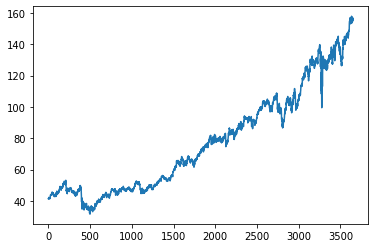

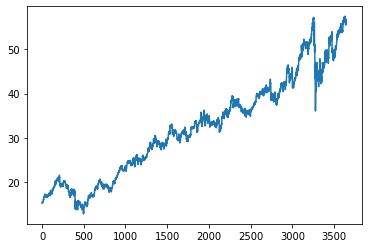

In [ ]:

'''
itc = pd.read_csv('ITC_1d_1Y.csv')
itc.Datetime = pd.to_datetime(itc.Datetime).dt.date
itc.set_index(itc.Datetime,inplace=True)
itc = np.array(itc['Close'])
itc = itc[np.logical_not(np.isnan(itc))]


nifty = pd.read_csv('NIFTY_ETF_1day.csv')
nifty.Datetime = pd.to_datetime(nifty.Datetime).dt.date
nifty.set_index(nifty.Datetime,inplace=True)
nifty = np.array(nifty['Close'])
nifty = nifty[np.logical_not(np.isnan(nifty))]
'''

paired_stocks = [['GOOGLE', 'MSFT']]


#itc = datafetcher('KO', num_days = 365 * 10) #itc
itc, nifty = get_pair_data('KO', 'PEP', num_days = 3650)
itc, nifty = np.array(itc), np.array(nifty)
print(itc.shape)
itc_shape = itc.shape[0]
#nifty = datafetcher('PEP', num_days = 365 * 10) #Pepsi
print(nifty.shape)
nifty_shape = nifty.shape[0]

min_shape = min(itc_shape, nifty_shape)
itc = itc[:min_shape]
nifty = nifty[:min_shape]




plt.plot(nifty)
niftyYMin, niftyYMax = plt.ylim()
scaleFactor = 1
plt.ylim(niftyYMin * scaleFactor, niftyYMax * scaleFactor)
plt.show()

plt.plot(itc)
ItcYMin, ItcYMax = plt.ylim()
scaleFactor = 1
plt.ylim(ItcYMin * scaleFactor, ItcYMax * scaleFactor)
plt.show()


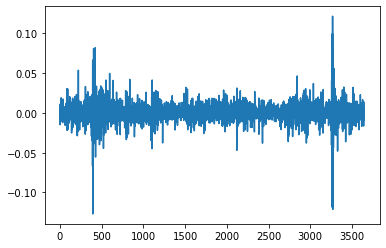

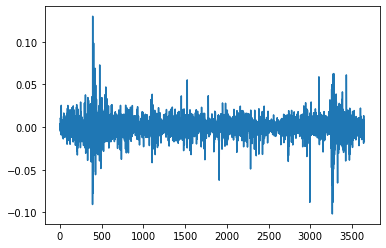

0.0


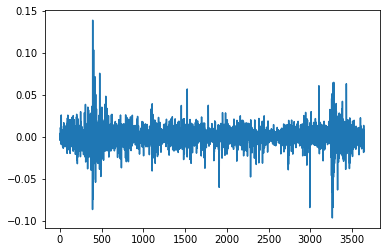

In [ ]:


plot(returns(nifty))
plot(returns(itc))

print(np.min(np.abs(diff_returns(itc))))
plot(diff_returns(itc))


(3649, 2)
Student Copula Summary
Student Copula with 2 dimensions


Parameters
--------------------------------------------------------------------------------
 Degree of Freedom  : 4.944152642849531e-09

 Correlation Matrix 
 1.000000  0.677204
 0.677204  1.000000

StudentParams(df=4.944152642849531e-09, rho=array([0.67720449]))
66597.13603984525


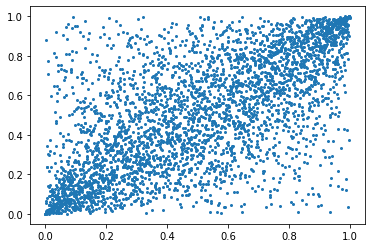

In [ ]:


Returns = np.concatenate([returns(nifty), returns(itc)], axis = 1)

print(Returns.shape)

cop = fitCopula(Returns, StudentCopula(2))

print(cop.log_lik(Returns, to_pobs=True, ties='average'))

u = cop.pobs(returns(nifty))
v = cop.pobs(returns(itc))

plt.scatter(u,v, s = 4)
plt.show()
# nifty_itc = pd.concat([itc,nifty],axis=1)
# nifty_itc.columns = ['nifty','itc']



# data = nifty_itc.values
# cop = StudentCopula(2)
# cop.fit(data,to_pobs=True,fix_df=False)



# cop.summary()

# cop.params

In [ ]:

coint=ts.coint(returns(nifty), returns(itc))
print(coint)

x = returns(nifty)
y = returns(itc)


model = sm.OLS(x, y)
model = model.fit()

hedge_coeff = model.params[0]
print("Hedge coeff: " + str(hedge_coeff))

spread = x[0:] - hedge_coeff * y[0:] #Hedge coeff nearly is 1

plt.plot(spread[20:120])
plt.figure(figsize=(8, 4))
plt.show()

adf = adfuller(spread, maxlag = 1)


print("ADF Value: " + str(adf[0]))

print("Probabilities: ")
print(adf[4])



NameError: ignored

<Figure size 1044x756 with 0 Axes>

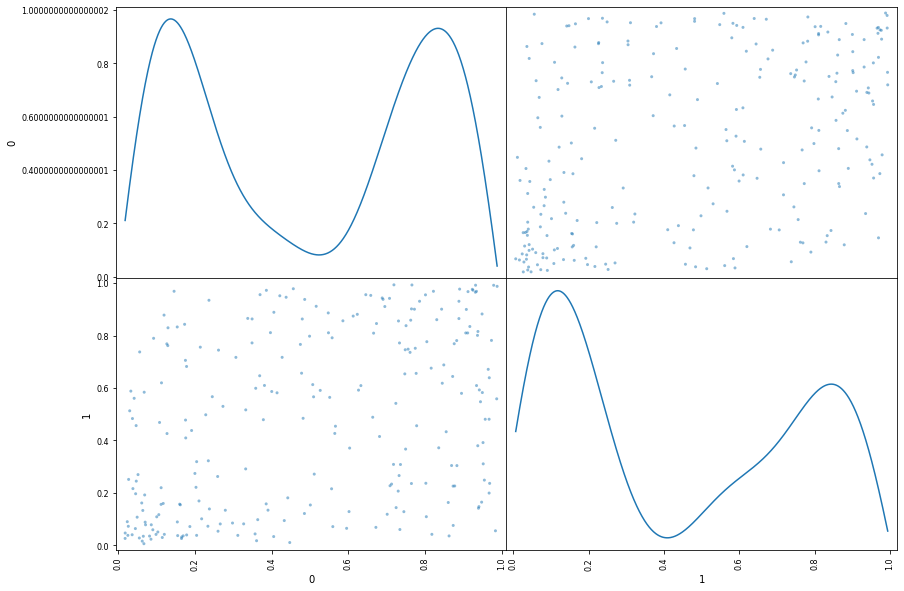

In [ ]:

n_samples = 249

df = 3
rho = 0.372184
calib_correl_matrix = np.array([[1,rho,],[rho,1]])
mu = np.zeros(len(calib_correl_matrix))
s = chi2.rvs(df)
#s = invgamma.pdf(df/2,df/2) 
Z = np.random.multivariate_normal(mu, calib_correl_matrix,n_samples)
X = np.sqrt(df/s)*Z #chi-square method
#X = np.sqrt(s)*Z #inverse gamma method
U = t.cdf(X,df)

U_pd = pd.DataFrame(U)
fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
pd.plotting.scatter_matrix(U_pd, figsize=(14,10), diagonal = 'kde')
plt.show()

covariance [[1.0, 0.33853750084679607], [0.33853750084679607, 1.0]] 

univariates [{'df': 0.9497633493057424, 'loc': 0.893224576125449, 'scale': 2.002511930117329, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}, {'df': 0.9374037468232989, 'loc': 2.213479710661672, 'scale': 1.025726870275256, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}] 

columns [0, 1] 

type copulas.multivariate.gaussian.GaussianMultivariate 



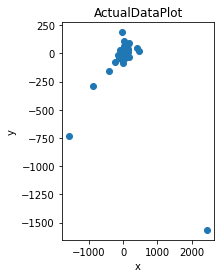

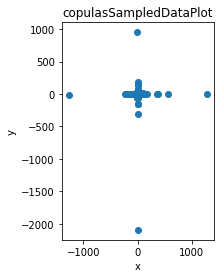

covariance [[1.0, 0.3385326760165253], [0.3385326760165253, 1.0]] 

univariates [{'df': 0.9497547456683553, 'loc': 0.00024709147131731965, 'scale': 0.9999431552772455, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}, {'df': 0.9374118963282845, 'loc': 0.00023429593312003307, 'scale': 0.9999378402782044, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}] 

columns [0, 1] 

type copulas.multivariate.gaussian.GaussianMultivariate 



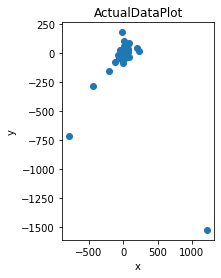

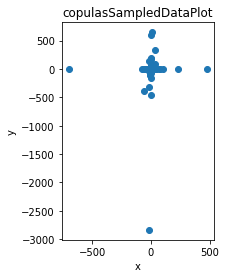

In [ ]:
###. Expirmenting on t copula to check how good is it converging

mu = [1,2.2]
S = [[4, 0.54], [0.54, 1]]
df = 1
n = 1000
data = multivariate_t_rvs(mu, S, df, n)

cop = copulasFitGaussianMulti(data)      ### to find the scale and mean
locX = cop.to_dict().get('univariates')[0].get('loc')
scaleX = cop.to_dict().get('univariates')[0].get('scale')

locY = cop.to_dict().get('univariates')[1].get('loc')
scaleY = cop.to_dict().get('univariates')[1].get('scale')

data[:, 0] = normalize(data[:, 0], scaleX, locX)
data[:, 1] = normalize(data[:, 1], scaleY, locY)
cop = copulasFitGaussianMulti(data)

# print(cop.check_fit())
# copulasFitVineCopulaCenter(data)
# copulasFitVineCopulaRegular(data)
# copulasFitVineCopulaDirect(data)

# pobs = StudentCopula(2, 0).pobs(data, ties = 'average')
# print(pobs.shape)
# plt.scatter(pobs[:, 0], pobs[:, 1])
# plt.show()
# cop.fit(data,to_pobs=True,fix_df=False)
# print(cop.summary())
# print(cop.params)




In [ ]:

class Clayton():
  def __init__(self, x, y):
    self.xTrain = x
    self.yTrain = y
    self.tau = kendalltau(x, y)[0]
    self.ecdf_x, self.ecdf_y  = ECDF(np.reshape(self.xTrain, len(self.xTrain))), ECDF(np.reshape(self.yTrain, len(self.yTrain)))
    self.u, self.v = [self.ecdf_x(a) for a in x], [self.ecdf_y(a) for a in y]
    self.theta = 2 * self.tau / (1 - self.tau)

  def conditionalCDF(self, xtest, ytest):
    u = np.array([self.ecdf_x(a) for a in xtest])
    v = np.array([self.ecdf_y(a) for a in ytest])
    MI_u_v = v ** (-self.theta - 1) * (u ** (-self.theta) + v ** (-self.theta) - 1) ** (-1 / self.theta - 1) # P(U<u|V=v)
    MI_v_u = u ** (-self.theta - 1) * (u ** (-self.theta) + v ** (-self.theta) - 1) ** (-1 / self.theta - 1) # P(V<v|U=u)
    return MI_u_v, MI_v_u
  
  def negative_log_lik(self, x, y):
    u = [self.ecdf_x(a) for a in x]
    v = [self.ecdf_y(a) for a in y]
    pdf = (self.theta + 1) * ((u ** (-self.theta) + v ** (-self.theta) - 1) ** (-2 - 1 / self.theta)) * (u ** (-self.theta - 1) * v ** (-self.theta - 1))
    return -np.log(pdf)
  
  def AIC(self):
    negative_log_likelihood = sum(np.nan_to_num(self.negative_log_lik(self.xTrain, self.yTrain)))
    return 2 * negative_log_likelihood + 2

class Student_t():
  def __init__(self, x, y, **kwargs):
    self.scale = 1
    for key, value in kwargs.items():
      if(key == 'scale' and value == 1):
        self.scale =1
      else:
        self.scale = 0
    ###initialize default scale parameteres as 1.
    self.scaleX = 1.0
    self.scaleY = 1.0
    self.locX = 0.0
    self.locY = 0.0

    self.xTrain = x
    self.yTrain = y
    self.data = np.concatenate((self.xTrain, self.yTrain), axis = 1)
    self.cop = copulasFitGaussianMulti(self.data) 
    self.df = max(self.cop.to_dict().get('univariates')[0].get('df'), self.cop.to_dict().get('univariates')[1].get('df'))
    self.df = np.ceil(self.df)
    if (self.scale == 1):
           ### to find the scale and mean
    
      self.locX = self.cop.to_dict().get('univariates')[0].get('loc')
      self.scaleX = self.cop.to_dict().get('univariates')[0].get('scale')

      self.locY = self.cop.to_dict().get('univariates')[1].get('loc')
      self.scaleY = self.cop.to_dict().get('univariates')[1].get('scale')
      self.xTrain = normalize(self.xTrain, self.scaleX, self.locX)
      self.yTrain = normalize(self.yTrain, self.scaleY, self.locY)
      self.data = np.concatenate((self.xTrain, self.yTrain), axis = 1)
      self.cop = copulasFitGaussianMulti(self.data)
    
    self.rho = self.cop.to_dict().get('covariance')[0][1]
    self.ecdf_x = ECDF(np.reshape(self.xTrain, len(self.xTrain)))
    self.ecdf_y = ECDF(np.reshape(self.yTrain, len(self.yTrain)))
    self.u = np.array([self.ecdf_x(a) for a in self.xTrain])
    self.v = np.array([self.ecdf_y(a) for a in self.yTrain])
    
    
  def conditionalCDF(self, xtest, ytest):
    ## scale the data before converting into quantiles
    xtest_normalized = normalize(xtest, self.scaleX, self.locX)
    ytest_normalized = normalize(ytest, self.scaleY, self.locY)
    u = np.array([self.ecdf_x(a) for a in xtest_normalized])
    v = np.array([self.ecdf_y(a) for a in ytest_normalized])
    u_x = t.ppf(u, self.df)
    v_y = t.ppf(v, self.df)
    variable = ((u_x - self.rho * v_y)*np.sqrt((self.df + 1)/(self.df + v_y * v_y)))/np.sqrt(1 - self.rho * self.rho)
    MI_u_v = t.cdf(variable, self.df + 1)
    variable = ((v_y - self.rho * u_x)*np.sqrt((self.df + 1)/(self.df + u_x * u_x)))/np.sqrt(1 - self.rho * self.rho)
    MI_v_u = t.cdf(variable, self.df + 1)
    return MI_u_v, MI_v_u

  def negative_log_lik(self, x, y):
    x_normalized = normalize(x, self.scaleX, self.locX)
    y_normalized = normalize(y, self.scaleY, self.locY)
    pdf = (math.gamma((self.df+2)/2)/(math.gamma(self.df/2)*pi_global*self.df*np.sqrt(1 - self.rho * self.rho)))*((1 + (x_normalized**2 + y_normalized**2 - 2*self.rho*x_normalized*y_normalized)/(self.df*(1 - self.rho**2)))**(-(self.df + 2)/2))
    return -np.log(pdf)
  def AIC(self):
    negative_log_likelihood = sum(np.nan_to_num(self.negative_log_lik(inv_normalize(self.xTrain, self.scaleX, self.locX), inv_normalize(self.yTrain, self.scaleY, self.locY))))
    return 2 * negative_log_likelihood + 2*2



In [ ]:
### code to iterate over confidence intervals to find best c.i.
### mean reversion spread = x[0:] - hedge_coeff * y[0:] where x and y are logged returns
### so that means for every unit of money utilised on stock x we spend hedge_coeff amount of money on stock y
### hedge_coeff is beta in our code
class Optimize():
  def __init__(self, xtrain, ytrain, xtest, ytest, hold_limit, beta, **kwargs):
    for key, value in kwargs.items():
      if (key == 'trading_cost'):
        trading_cost = value
      if (key == 'slippage_open_x'):
        slippage_open_x = value
      if (key == 'slippage_exit_x'):
        slippage_exit_x = value
      if (key == 'slippage_open_y'):
        slippage_open_y = value
      if (key == 'slippage_exit_y'):
        slippage_exit_y = value

      if (key == 'model'):
        if (value == 'Student_t'):
          self.model = Student_t(xtrain, ytrain, scale = 1)
        if (value == 'Clayton'):
          self.model = Clayton(xtrain, ytrain)
    
    ### create trade series for long of xtrain
    self.trade_long_xtrain = np.zeros((100, 100, len(xtrain)))
    tmp1 = float('-inf')
    tmp2 = float('-inf')
    for i in range(40, 60, 5):
      for j in range(500, 520, 5):
        ci_open = (float(i)/1000.0)
        ci_exit = (float(j)/1000.0)
        self.trade_long_xtrain[int((ci_open - 0)/0.005), int((ci_exit - 0.5)/0.005), :], stats = tradeLong(ci_open, ci_exit, xtrain, ytrain, hold_limit, self.model, 0, 1.0, slippage_open = slippage_open_x, slippage_exit = slippage_exit_x, trading_cost = trading_cost)
        if (stats['net_returns'] > tmp1):
          self.metrics_long_xtrain_returns = stats
          tmp1 = stats['net_returns']  

        if (stats['net_total_profit'] > tmp2):
          self.metrics_long_xtrain_profit = stats
          tmp2 = stats['net_total_profit']  

        # if(i % 10 == 0 or j % 10 == 0):
        #   print((i,j))
        #   print(stats)


    ### create trade series for long of ytrain
    self.trade_long_ytrain = np.zeros((100, 100, len(ytrain)))
    tmp1 = float('-inf')
    tmp2 = float('-inf')
    for i in range(40, 60, 5):
      for j in range(500, 520, 5):
        ci_open = (float(i)/1000.0)
        ci_exit = (float(j)/1000.0)
        self.trade_long_ytrain[int((ci_open - 0)/0.005), int((ci_exit - 0.5)/0.005), :], stats = tradeLong(ci_open, ci_exit, xtrain, ytrain, hold_limit, self.model, 1, beta, slippage_open = slippage_open_y, slippage_exit = slippage_exit_y, trading_cost = trading_cost)
        if (stats['net_returns'] > tmp1):
          self.metrics_long_ytrain_returns = stats
          tmp1 = stats['net_returns']  

        if (stats['net_total_profit'] > tmp2):
          self.metrics_long_ytrain_profit = stats
          tmp2 = stats['net_total_profit']

    ### create trade series for long of xtest
    # self.trade_long_xtest = np.zeros((100, 100, len(xtest)))
    # tmp1 = float('-inf')
    # tmp2 = float('-inf')
    # for i in range(20, 60, 5):
    #   for j in range(500, 700, 5):
    #     ci_open = (float(i)/1000.0)
    #     ci_exit = (float(j)/1000.0)
    #     self.trade_long_xtest[int((ci_open - 0)/0.005), int((ci_exit - 0.5)/0.005), :], stats = tradeLong(ci_open, ci_exit, xtest, ytest, hold_limit, self.model, 0, 1.0, slippage_open = slippage_open_x, slippage_exit = slippage_exit_x, trading_cost = trading_cost)
    #     if (stats['net_returns'] > tmp1):
    #       self.metrics_long_xtest_returns = stats
    #       tmp1 = stats['net_returns']  

    #     if (stats['net_total_profit'] > tmp2):
    #       self.metrics_long_xtest_profit = stats
    #       tmp2 = stats['net_total_profit']
    self.trade_long_xtest, self.metrics_long_xtest_profit = tradeLong(self.metrics_long_xtrain_profit['ci_open'], self.metrics_long_xtrain_profit['ci_exit'], xtest, ytest, hold_limit, self.model, 0, 1.0, slippage_open = slippage_open_x, slippage_exit = slippage_exit_x, trading_cost = trading_cost)

    ### create trade series for long of ytest
    # self.trade_long_ytest = np.zeros((100, 100, len(ytest)))
    # tmp1 = float('-inf')
    # tmp2 = float('-inf')
    # for i in range(40, 60, 5):
    #   for j in range(500, 520, 5):
    #     ci_open = (float(i)/1000.0)
    #     ci_exit = (float(j)/1000.0)
    #     self.trade_long_ytest[int((ci_open - 0)/0.005), int((ci_exit - 0.5)/0.005), :], stats = tradeLong(ci_open, ci_exit, xtest, ytest, hold_limit, self.model, 1, beta, slippage_open = slippage_open_y, slippage_exit = slippage_exit_y, trading_cost = trading_cost)
    #     if (stats['net_returns'] > tmp1):
    #       self.metrics_long_ytest_returns = stats
    #       tmp1 = stats['net_returns']  

    #     if (stats['net_total_profit'] > tmp2):
    #       self.metrics_long_ytest_profit = stats
    #       tmp2 = stats['net_total_profit']
    self.trade_long_ytest, self.metrics_long_ytest_profit = tradeLong(self.metrics_long_ytrain_profit['ci_open'], self.metrics_long_ytrain_profit['ci_exit'], xtest, ytest, hold_limit, self.model, 1, beta, slippage_open = slippage_open_y, slippage_exit = slippage_exit_y, trading_cost = trading_cost)




    ###similarly for short
    ### create trade series for short of xtrain
    self.trade_short_xtrain = np.zeros((100, 100, len(xtrain)))
    tmp1 = float('-inf')
    tmp2 = float('-inf')
    for i in range(940, 980, 5):
      for j in range(480, 500, 5):
        ci_open = (float(i)/1000.0)
        ci_exit = (float(j)/1000.0)
        self.trade_short_xtrain[int((ci_open - 0.5)/0.005), int((ci_exit - 0.0)/0.005), :], stats = tradeShort(ci_open, ci_exit, xtrain, ytrain, hold_limit, self.model, 0, 1.0, slippage_open = slippage_open_x, slippage_exit = slippage_exit_x, trading_cost = trading_cost)
        if (stats['net_returns'] > tmp1):
          self.metrics_short_xtrain_returns = stats
          tmp1 = stats['net_returns']  

        if (stats['net_total_profit'] > tmp2):
          self.metrics_short_xtrain_profit = stats
          tmp2 = stats['net_total_profit']

    ### create trade series for short of ytrain
    self.trade_short_ytrain = np.zeros((100, 100, len(ytrain)))
    tmp1 = float('-inf')
    tmp2 = float('-inf')
    for i in range(940, 980, 5):
      for j in range(480, 500, 5):
        ci_open = (float(i)/1000.0)
        ci_exit = (float(j)/1000.0)
        self.trade_short_ytrain[int((ci_open - 0.5)/0.005), int((ci_exit - 0.0)/0.005), :], stats = tradeShort(ci_open, ci_exit, xtrain, ytrain, hold_limit, self.model, 1, beta, slippage_open = slippage_open_y, slippage_exit = slippage_exit_y, trading_cost = trading_cost)
        if (stats['net_returns'] > tmp1):
          self.metrics_short_ytrain_returns = stats
          tmp1 = stats['net_returns']  

        if (stats['net_total_profit'] > tmp2):
          self.metrics_short_ytrain_profit = stats
          tmp2 = stats['net_total_profit']

    ### create trade series for short of xtest
    # self.trade_short_xtest = np.zeros((100, 100, len(xtest)))
    # tmp1 = float('-inf')
    # tmp2 = float('-inf')
    # for i in range(940, 980, 5):
    #   for j in range(300, 500, 5):
    #     ci_open = (float(i)/1000.0)
    #     ci_exit = (float(j)/1000.0)
    #     self.trade_short_xtest[int((ci_open - 0.5)/0.005), int((ci_exit - 0.0)/0.005), :], stats = tradeShort(ci_open, ci_exit, xtest, ytest, hold_limit, self.model, 0, 1.0, slippage_open = slippage_open_x, slippage_exit = slippage_exit_x, trading_cost = trading_cost)
    #     if (stats['net_returns'] > tmp1):
    #       self.metrics_short_xtest_returns = stats
    #       tmp1 = stats['net_returns']  

    #     if (stats['net_total_profit'] > tmp2):
    #       self.metrics_short_xtest_profit = stats
    #       tmp2 = stats['net_total_profit']
    self.trade_short_xtest, self.metrics_short_xtest_profit = tradeShort(self.metrics_short_xtrain_profit['ci_open'], self.metrics_short_xtrain_profit['ci_exit'], xtest, ytest, hold_limit, self.model, 0, 1.0, slippage_open = slippage_open_x, slippage_exit = slippage_exit_x, trading_cost = trading_cost)


    ### create trade series for short of ytest
    # self.trade_short_ytest = np.zeros((100, 100, len(ytest)))
    # tmp1 = float('-inf')
    # tmp2 = float('-inf')
    # for i in range(940, 980, 5):
    #   for j in range(480, 500, 5):
    #     ci_open = (float(i)/1000.0)
    #     ci_exit = (float(j)/1000.0)
    #     self.trade_short_ytest[int((ci_open - 0.5)/0.005), int((ci_exit - 0.0)/0.005), :], stats = tradeShort(ci_open, ci_exit, xtest, ytest, hold_limit, self.model, 1, beta, slippage_open = slippage_open_y, slippage_exit = slippage_exit_y, trading_cost = trading_cost)
    #     if (stats['net_returns'] > tmp1):
    #       self.metrics_short_ytest_returns = stats
    #       tmp1 = stats['net_returns']  

    #     if (stats['net_total_profit'] > tmp2):
    #       self.metrics_short_ytest_profit = stats
    #       tmp2 = stats['net_total_profit']
    self.trade_short_ytest, self.metrics_short_ytest_profit = tradeShort(self.metrics_short_ytrain_profit['ci_open'], self.metrics_short_ytrain_profit['ci_exit'], xtest, ytest, hold_limit, self.model, 1, beta, slippage_open = slippage_open_y, slippage_exit = slippage_exit_y, trading_cost = trading_cost)

  

  
def tradeLong(ci_open, ci_exit, x, y, hold_limit, model, index, dollar_unit, **kwargs):
  slippage_open = 0.0
  slippage_exit = 0.0
  trading_cost = 0.0
  for key, value in kwargs.items():
    if (key == 'slippage_open'):
      slippage_open = value
    if (key == 'slippage_exit'):
      slippage_exit = value
    if (key == 'trading_cost'):
      trading_cost = value
  
  MI_u_v, MI_v_u = model.conditionalCDF(x, y)
  length = len(MI_u_v)
  ### 0 for do nothing, 1 for open_positon/trade, 2 for exit, 3 for force exit, 4 for open_position and force_exit
  trade_signal = np.zeros((length), dtype = np.int)
  ### return trade series 
  ### first fix stock based on index
  if (index == 0):
    MI = MI_u_v
    returns = x
  if (index == 1):
    MI = MI_v_u
    returns = y
  n_open_positions = 0
  n_trades = 0
  n_force_exited = 0
  avg_returns = 0.0
  avg_returns_force_exited = 0.0
  total_profit = 0.0
  total_profit_force_exited = 0.0
  cumulative_return = np.zeros((len(returns)), dtype = np.float)  
  for i in range(length):
    if(i == 0):
      cumulative_return[i] = returns[0]
    else:
      cumulative_return[i] = cumulative_return[i - 1] + returns[i]

    force_exit = 0
    if (MI[i] < ci_open):
      trade_signal[i] = 1
      n_open_positions +=1 
    if (MI[i] > ci_exit and n_open_positions > 0):
      trade_signal[i] = 2
      n_trades += n_open_positions 
      for j in range(i - 1, i - hold_limit - 1, -1):
        if (trade_signal[j] == 2):
          break
        if (trade_signal[j] == 1 or trade_signal[j] == 4):
          n_open_positions -= 1
          avg_returns += (dollar_unit * (cumulative_return[i] - cumulative_return[j] + np.log((1 - abs(slippage_exit))/(1 + abs(slippage_open)))))
          total_profit += (dollar_unit * ((math.exp(cumulative_return[i] - cumulative_return[j])) * ((1 - abs(slippage_exit))/(1 + abs(slippage_open))) - 1.0))
      if (n_open_positions != 0):
        raise ValueError('no of open positions does not equal 0')
      continue
    if (i - hold_limit >= 0 and (trade_signal[i - hold_limit] == 1 or trade_signal[i - hold_limit] == 4)):
      force_exit = 1
      for j in range(i-hold_limit, i):
        if(trade_signal[j] == 2):
          force_exit = 0
          break
    if (force_exit == 1):
      n_open_positions -= 1
      n_force_exited += 1 
      avg_returns_force_exited += (cumulative_return[i] - cumulative_return[i - hold_limit] + np.log((1 - abs(slippage_exit))/(1 + abs(slippage_open))))
      total_profit_force_exited += (dollar_unit * ((math.exp(cumulative_return[i] - cumulative_return[i - hold_limit])) * ((1 - abs(slippage_exit))/(1 + abs(slippage_open))) - 1.0))
      if (trade_signal[i] == 1):
        trade_signal[i] = 4
      else:
        trade_signal[i] = 3
  
  avg_returns_lambda = lambda x, y : x/y if (y > 0) else 0.0
  
  stats = {}
  stats['n_trades'] = n_trades
  stats['n_force_exited'] = n_force_exited
  stats['avg_returns'] = avg_returns_lambda(avg_returns, n_trades)
  stats['avg_returns_force_exited'] = avg_returns_lambda(avg_returns_force_exited, n_force_exited)
  stats['total_profit'] = total_profit
  stats['total_profit_force_exited'] = total_profit_force_exited
  stats['net_returns'] = avg_returns_lambda(avg_returns + avg_returns_force_exited, n_trades + n_force_exited)
  stats['net_total_profit'] = total_profit + total_profit_force_exited - trading_cost * (n_trades + n_force_exited)
  stats['ci_open'] = ci_open
  stats['ci_exit'] = ci_exit
  return trade_signal, stats  

def tradeShort(ci_open, ci_exit, x, y, hold_limit, model, index, dollar_unit, **kwargs):
  slippage_open = 0.0
  slippage_exit = 0.0
  trading_cost = 0.0
  for key, value in kwargs.items():
    if (key == 'slippage_open'):
      slippage_open = value
    if (key == 'slippage_exit'):
      slippage_exit = value
    if (key == 'trading_cost'):
      trading_cost = value

  MI_u_v, MI_v_u = model.conditionalCDF(x, y)
  length = len(MI_u_v)
  ### 0 for do nothing, 1 for open_positon/trade, 2 for exit, 3 for force exit, 4 for open_position and force_exit
  trade_signal = np.zeros((length), dtype = np.int)
  ### return trade series 
  ### first fix stock based on index
  if (index == 0):
    MI = MI_u_v
    returns = x
  if (index == 1):
    MI = MI_v_u
    returns = y
  n_open_positions = 0
  n_trades = 0
  n_force_exited = 0
  avg_returns = 0.0
  avg_returns_force_exited = 0.0
  total_profit = 0.0
  total_profit_force_exited = 0.0
  cumulative_return = np.zeros((len(returns)), dtype = np.float)  
  
  for i in range(length):
    if(i == 0):
      cumulative_return[i] = returns[0]
    else:
      cumulative_return[i] = cumulative_return[i - 1] + returns[i]

    force_exit = 0
    if (MI[i] > ci_open):
      trade_signal[i] = 1
      n_open_positions +=1 
    if (MI[i] < ci_exit and n_open_positions > 0):
      trade_signal[i] = 2
      n_trades += n_open_positions 
      for j in range(i - 1, i - hold_limit - 1, -1):
        if (trade_signal[j] == 2):
          break
        if (trade_signal[j] == 1 or trade_signal[j] == 4):
          n_open_positions -= 1
          avg_returns += (dollar_unit * (cumulative_return[i] - cumulative_return[j] + np.log((1 + abs(slippage_exit))/(1 - abs(slippage_open)))))
          total_profit += (dollar_unit * ((math.exp(cumulative_return[i] - cumulative_return[j])) * ((1 + abs(slippage_exit))/(1 - abs(slippage_open))) - 1.0))
      if (n_open_positions != 0):
        raise ValueError('no of open positions does not equal 0')
      continue
    if (i - hold_limit >= 0 and (trade_signal[i - hold_limit] == 1 or trade_signal[i - hold_limit] == 4)):
      force_exit = 1
      for j in range(i-hold_limit, i):
        if(trade_signal[j] == 2):
          force_exit = 0
          break
    if (force_exit == 1):
      n_open_positions -= 1
      n_force_exited += 1 
      avg_returns_force_exited += (cumulative_return[i] - cumulative_return[i - hold_limit] + np.log((1 + abs(slippage_exit))/(1 - abs(slippage_open))))
      total_profit_force_exited += (dollar_unit * ((math.exp(cumulative_return[i] - cumulative_return[i - hold_limit])) * ((1 + abs(slippage_exit))/(1 - abs(slippage_open))) - 1.0))
      if (trade_signal[i] == 1):
        trade_signal[i] = 4
      else:
        trade_signal[i] = 3
  
  avg_returns_lambda = lambda x, y : x/y if (y > 0) else 0.0

  stats = {}
  stats['n_trades'] = n_trades
  stats['n_force_exited'] = n_force_exited
  stats['avg_returns'] = -avg_returns_lambda(avg_returns, n_trades)
  stats['avg_returns_force_exited'] = -avg_returns_lambda(avg_returns_force_exited, n_force_exited)
  stats['total_profit'] = -total_profit
  stats['total_profit_force_exited'] = -total_profit_force_exited
  stats['net_returns'] = -avg_returns_lambda(avg_returns + avg_returns_force_exited, n_trades + n_force_exited)
  stats['net_total_profit'] = -(total_profit + total_profit_force_exited) - trading_cost * (n_trades + n_force_exited)
  stats['ci_open'] = ci_open
  stats['ci_exit'] = ci_exit
  return trade_signal, stats
  

In [ ]:
def trade_Traditional_Copula(ci_upper, ci_lower, x, y, model, dollar_unit, **kwargs):
  slippage_open_x = 0.0
  slippage_exit_x = 0.0
  slippage_open_y = 0.0
  slippage_exit_y = 0.0
  trading_cost = 0.0
  for key, value in kwargs.items():
      if (key == 'trading_cost'):
        trading_cost = value
      if (key == 'slippage_open_x'):
        slippage_open_x = value
      if (key == 'slippage_exit_x'):
        slippage_exit_x = value
      if (key == 'slippage_open_y'):
        slippage_open_y = value
      if (key == 'slippage_exit_y'):
        slippage_exit_y = value
  
  MI_u_v, MI_v_u = model.conditionalCDF(x, y)
  length = len(MI_u_v)
  ## 0 for do nothing
  ## 1 for MI_u_v >= ci_upper and  MI_v_u <= ci_lower
  ## 2 for MI_u_v <= ci_lower and  MI_v_u >= ci_upper
  ## 3 for exiting 1
  ## 4 for exiting 2
  trade_signal = np.zeros((length), dtype = np.int)
  ### return trade series 
  n_open_positions_1 = 0
  n_open_positions_2 = 0
  n_trades = 0
  avg_returns = 0.0
  total_profit = 0.0
  hold_limit_total = 0
  hold_limit_min = np.float('inf')
  hold_limit_max = np.float('-inf')
  cumulative_return_x = np.zeros((len(x)), dtype = np.float)  
  cumulative_return_y = np.zeros((len(y)), dtype = np.float)  
  for i in range(length):
    if (i == 0):
      cumulative_return_x[i] = x[0]
      cumulative_return_y[i] = y[0]
    else:
      cumulative_return_x[i] = cumulative_return_x[i - 1] + x[i]
      cumulative_return_y[i] = cumulative_return_y[i - 1] + y[i]
    if (MI_u_v[i] <= ci_lower and MI_v_u[i] >= ci_upper):
      trade_signal[i] = 2
      n_open_positions_2 +=1 
    if (MI_u_v[i] >= ci_upper and MI_v_u[i] <= ci_lower):
      trade_signal[i] = 1
      n_open_positions_1 +=1

    if (MI_u_v[i] <= ci_upper and MI_u_v[i] >= 0.5 and MI_v_u[i] <= 0.5 and MI_v_u[i] >= ci_lower and n_open_positions_2 > 0):
      ## 2 gets exited
      j = i - 1
      tmp = 0
      while (j >= 0):
        if (trade_signal[j] == 4):
          break
        # if (trade_signal[j] == 1):
        #   raise ValueError('Not possible scenario 1 stays withput closing before 2 at {}, {}', i, j)
        if (trade_signal[j] == 2):
          tmp += 1
          n_trades += 2                ## 2 positions being exited at the same time
          hold_limit_total += (i - j)
          if (hold_limit_min > (i-j)):
            hold_limit_min = i-j
          if (hold_limit_max < (i - j)):
            hold_limit_max = i-j          
          avg_returns += ((cumulative_return_x[i] - cumulative_return_x[j] + np.log((1 - abs(slippage_exit_x))/(1 + abs(slippage_open_x)))) - dollar_unit * (cumulative_return_y[i] - cumulative_return_y[j] + np.log((1 + abs(slippage_exit_y))/(1 - abs(slippage_open_y)))))
          total_profit += ((math.exp(cumulative_return_x[i] - cumulative_return_x[j])) * ((1 - abs(slippage_exit_x))/(1 + abs(slippage_open_x))) - 1.0) - (dollar_unit * ((math.exp(cumulative_return_y[i] - cumulative_return_y[j])) * ((1 + abs(slippage_exit_y))/(1 - abs(slippage_open_y))) - 1.0))
        j -= 1 
      if (tmp > 0):
        trade_signal[i] = 4
      if (n_open_positions_2 != tmp):
        raise ValueError('no of open positions does not equal 0 at ', i)          
      n_open_positions_2 = 0
    
    if (MI_u_v[i] >= ci_lower and MI_u_v[i] <= 0.5 and MI_v_u[i] >= 0.5 and MI_v_u[i] <= ci_upper and n_open_positions_1 > 0):
      ## 1 gets exited
      j = i - 1
      tmp = 0
      while (j >= 0):
        if (trade_signal[j] == 3):
          break
        # if (trade_signal[j] == 2):
        #   raise ValueError('Not possible scenario 2 stays withput closing before 1')
        if (trade_signal[j] == 1):
          tmp += 1
          n_trades += 2                ## 2 positions being exited at the same time
          hold_limit_total += (i - j)
          if (hold_limit_min > (i-j)):
            hold_limit_min = i-j
          if (hold_limit_max < (i - j)):
            hold_limit_max = i-j          
          avg_returns += (dollar_unit * (cumulative_return_y[i] - cumulative_return_y[j] + np.log((1 - abs(slippage_exit_y))/(1 + abs(slippage_open_y)))) -  (cumulative_return_x[i] - cumulative_return_x[j] + np.log((1 + abs(slippage_exit_x))/(1 - abs(slippage_open_x)))))
          total_profit += (dollar_unit * ((math.exp(cumulative_return_y[i] - cumulative_return_y[j])) * ((1 - abs(slippage_exit_y))/(1 + abs(slippage_open_y))) - 1.0)) -  ((math.exp(cumulative_return_x[i] - cumulative_return_x[j])) * ((1 + abs(slippage_exit_x))/(1 - abs(slippage_open_x))) - 1.0)
        j -= 1 
      if (tmp > 0):
        trade_signal[i] = 3
      if (n_open_positions_1 != tmp):
        raise ValueError('no of open positions does not equal 0 at ', i)          
      n_open_positions_1 = 0
  
  avg_returns_lambda = lambda x, y : x/y if (y > 0) else 0.0
  
  stats = {}
  stats['n_trades'] = n_trades
  stats['avg_returns'] = avg_returns_lambda(avg_returns, n_trades)
  stats['total_profit'] = total_profit - trading_cost * n_trades
  stats['ci_upper'] = ci_upper
  stats['ci_lower'] = ci_lower
  stats['hold_limit_avg'] = avg_returns_lambda(hold_limit_total * 2, n_trades)
  stats['hold_limit_min'] = hold_limit_min
  stats['hold_limit_max'] = hold_limit_max
  return trade_signal, stats 

In [ ]:
class Optimize_TraditionalCopula():
  def __init__(self, xtrain, ytrain, xtest, ytest, hold_limit, beta, **kwargs):
    for key, value in kwargs.items():
      if (key == 'trading_cost'):
        trading_cost = value
      if (key == 'slippage_open_x'):
        slippage_open_x = value
      if (key == 'slippage_exit_x'):
        slippage_exit_x = value
      if (key == 'slippage_open_y'):
        slippage_open_y = value
      if (key == 'slippage_exit_y'):
        slippage_exit_y = value
      if (key == 'model'):
        if (value == 'Student_t'):
          self.model = Student_t(xtrain, ytrain, scale = 1)
        if (value == 'Clayton'):
          self.model = Clayton(xtrain, ytrain)
    
    ### create trade series for long of xtrain
    self.trade_long_train = np.zeros((len(xtrain),), dtype = int)
    self.trade_long_train, self.stats_train = trade_Traditional_Copula(0.95, 0.05, xtrain, ytrain, self.model, beta, trading_cost = trading_cost, slippage_open_x = slippage_open_x, slippage_exit_x = slippage_exit_x, slippage_open_y = slippage_open_y, slippage_exit_y = slippage_exit_y)
    self.trade_long_test, self.stats_test = trade_Traditional_Copula(0.95, 0.05, xtest, ytest, self.model, beta, trading_cost = trading_cost, slippage_open_x = slippage_open_x, slippage_exit_x = slippage_exit_x, slippage_open_y = slippage_open_y, slippage_exit_y = slippage_exit_y)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


covariance [[1.0, 0.6636811275100869], [0.6636811275100869, 1.0]] 

univariates [{'df': 4.184886748366709, 'loc': 0.0005575872205406504, 'scale': 0.006870223278147975, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}, {'df': 4.7068451279149155, 'loc': 0.00047866260802269803, 'scale': 0.006693273455994858, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}] 

columns [0, 1] 

type copulas.multivariate.gaussian.GaussianMultivariate 



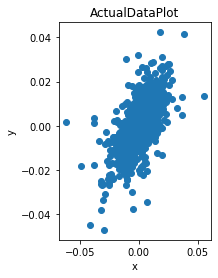

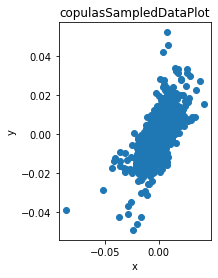

covariance [[1.0, 0.6636811274903622], [0.6636811274903622, 1.0]] 

univariates [{'df': 4.184885274576951, 'loc': -9.52856138715181e-07, 'scale': 1.0000017411582613, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}, {'df': 4.706867143981736, 'loc': 9.082905438494268e-07, 'scale': 1.000000491743435, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}] 

columns [0, 1] 

type copulas.multivariate.gaussian.GaussianMultivariate 



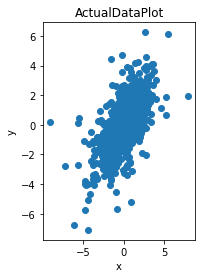

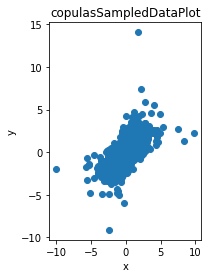

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:193: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:209: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this w

{'n_trades': 66, 'n_force_exited': 0, 'avg_returns': 0.0020570224488200323, 'avg_returns_force_exited': 0.0, 'total_profit': 0.141133523339656, 'total_profit_force_exited': 0.0, 'net_returns': 0.0020570224488200323, 'net_total_profit': 0.141133523339656, 'ci_open': 0.045, 'ci_exit': 0.505}
{'n_trades': 86, 'n_force_exited': 0, 'avg_returns': 0.002482767454260224, 'avg_returns_force_exited': 0.0, 'total_profit': 0.2215267470088823, 'total_profit_force_exited': 0.0, 'net_returns': 0.002482767454260224, 'net_total_profit': 0.2215267470088823, 'ci_open': 0.055, 'ci_exit': 0.5}
{'n_trades': 57, 'n_force_exited': 0, 'avg_returns': 0.0008433512231677654, 'avg_returns_force_exited': -0.0, 'total_profit': 0.042834054165439506, 'total_profit_force_exited': -0.0, 'net_returns': 0.0008433512231677654, 'net_total_profit': 0.042834054165439506, 'ci_open': 0.975, 'ci_exit': 0.48}
{'n_trades': 111, 'n_force_exited': 0, 'avg_returns': 0.0003044275091797548, 'avg_returns_force_exited': -0.0, 'total_prof

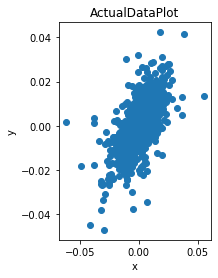

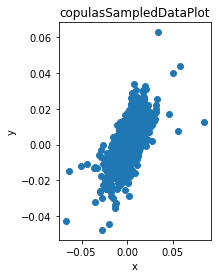

covariance [[1.0, 0.6636811274903622], [0.6636811274903622, 1.0]] 

univariates [{'df': 4.184885274576951, 'loc': -9.52856138715181e-07, 'scale': 1.0000017411582613, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}, {'df': 4.706867143981736, 'loc': 9.082905438494268e-07, 'scale': 1.000000491743435, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}] 

columns [0, 1] 

type copulas.multivariate.gaussian.GaussianMultivariate 



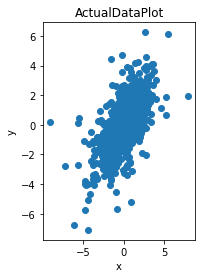

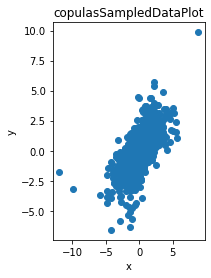

{'n_trades': 100, 'avg_returns': 0.00020851185166245956, 'total_profit': 0.021358536057527466, 'ci_upper': 0.95, 'ci_lower': 0.05, 'hold_limit_avg': 4.14, 'hold_limit_min': 1, 'hold_limit_max': 15}
{'n_trades': 10, 'avg_returns': -0.0007029157611601549, 'total_profit': -0.006756721991234005, 'ci_upper': 0.95, 'ci_lower': 0.05, 'hold_limit_avg': 4.0, 'hold_limit_min': 3, 'hold_limit_max': 5}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr

In [ ]:
#train-test split
sym1, sym2 = 'KO', 'PEP'
s1, s2 = get_pair_data(sym1, sym2, num_days = 3650)

#print(s1)
#print(s2)

returns1, returns2 = returns(s1), returns(s2)
offset_period = 365 * 2
training_period = 365 * 5
testing_period = 365
rollover_period = 365

xtrain, ytrain, xtest, ytest = returns1[offset_period : offset_period + training_period], returns2[offset_period : offset_period + training_period], returns1[offset_period + training_period: offset_period + training_period+testing_period], returns2[offset_period + training_period : offset_period + training_period+testing_period]
### assert the length of training data set and test data set and put code for evaluating hedge_coeff
# xtrain = np.reshape(xtrain, (len(xtrain)))
# ytrain = np.reshape(ytrain, (len(ytrain)))
# xtest = np.reshape(xtest, (len(xtest)))
# ytest = np.reshape(ytest, (len(ytest)))
slippage = 0
optimizer_new = Optimize(xtrain, ytrain, xtest, ytest, 30, beta = 1, model='Student_t', trading_cost = 0.0, slippage_open_x = slippage, slippage_open_y = slippage, slippage_exit_x = slippage, slippage_exit_y = slippage) #or 'Clayton'
# print(optimizer_new.metrics_long_xtrain_returns)
print(optimizer_new.metrics_long_xtrain_profit)
# print(optimizer_new.metrics_long_ytrain_returns)
print(optimizer_new.metrics_long_ytrain_profit)
# print(optimizer_new.metrics_short_xtrain_returns)
print(optimizer_new.metrics_short_xtrain_profit)
# print(optimizer_new.metrics_short_ytrain_returns)
print(optimizer_new.metrics_short_ytrain_profit)

# print(optimizer_new.metrics_long_xtest_returns)
print(optimizer_new.metrics_long_xtest_profit)
# print(optimizer_new.metrics_long_ytest_returns)
print(optimizer_new.metrics_long_ytest_profit)
# print(optimizer_new.metrics_short_xtest_returns)
print(optimizer_new.metrics_short_xtest_profit)
# print(optimizer_new.metrics_short_ytest_returns)
print(optimizer_new.metrics_short_ytest_profit)
optimizer = Optimize_TraditionalCopula(xtrain, ytrain, xtest, ytest, 500, beta = 1, model='Student_t', trading_cost = 0.0, slippage_open_x = slippage, slippage_open_y = slippage, slippage_exit_x = slippage, slippage_exit_y = slippage)
print(optimizer.stats_train)
print(optimizer.stats_test)

#xtrain = 

In [ ]:
trading_sig = optimizer_new.trade_long_ytest
prices = s2[offset_period + training_period : offset_period + training_period+testing_period]
returns = ytest
colours = []
for i in range(len(trading_sig)):
  if (trading_sig[i] == 0):
    colours.append('b')
  elif (trading_sig[i] == 1):
    colours.append('r')
  elif (trading_sig[i] == 2):
    colours.append('g')

plt.figure(figsize=(20,20))
plt.plot(returns, color = colours)
# plt.plot(trading_sig)
# # plt.plot(prices)
# plt.plot(returns)

plt.show()

ValueError: ignored

<Figure size 1440x1440 with 1 Axes>

In [ ]:
### code to iterate over confidence intervals to find best c.i.
### mean reversion spread = x[0:] - hedge_coeff * y[0:] where x and y are logged returns
### so that means for every unit of money utilised on stock x we spend hedge_coeff amount of money on stock y
### hedge_coeff is beta in our code

'''
1. Flag by calculation revisit, corner case
2. Required stats: 
  number of trades, 
  number of force exits (+-2), 
  average return in case of successful trade, force exits, number of holding days(average, minimum and maximum) for successful trades, force exits
3. Trading signals (0 - Hold, 1 - Buy, 2 - Sell, 3 - Exit) 
'''



class OptimizeStrategy2():
  def __init__(self, xtrain, ytrain, xtest, ytest, hold_limit, beta, **kwargs):
    for key, value in kwargs.items():
      if (key == 'model'):
        if (value == 'Student_t'):
          self.model = Student_t(xtrain, ytrain, scale = 1)
        if (value == 'Clayton'):
          self.model = Clayton(xtrain, ytrain)
    
    MI_u_v, MI_v_u = self.model.conditionalCDF(xtrain, ytrain)

    #Flag, Action for X
    FlagX, ActionX = get_cumulativeFlag(MI_u_v)
    #Flag, Action for y
    FlagY, ActionY = get_cumulativeFlag(MI_v_u)

    cumulative_return = 0
    xShort = 0
    xLong = 0
    yShort = 0
    yLong = 0
    for ind in range(len(ActionX)):
      if (FlagX[ind+1] >= 0.6 and FlagX[ind] < 0.6) or (FlagX[ind+1] <= 0.6 and FlagX[ind] > 0.6): #FlagX Reaches 0.6 
        #Short X and buy Y
        xShort = xtrain[ind+1]
        yLong = ytrain[ind+1]
      
      elif (FlagX[ind+1] >= -0.6 and FlagX[ind] < -0.6) or (FlagX[ind+1] <= -0.6 and FlagX[ind] > -0.6): #FlagX Reaches -0.6
        #Short Y and buy X
        yShort = ytrain[ind+1]
        xLong = xtrain[ind+1]

      elif FlagX[ind+1] == 0:
        #Exited
        if xShort != 0 and yLong != 0:
          cumulative_return += (ytrain[ind+1] - yLong)
          cumulative_return -= (xtrain[ind+1] - xShort)
          #Reset
          yLong = 0
          xShort = 0
        
        elif yShort != 0 and xLong != 0:
          cumulative_return += (xtrain[ind+1] - xLong)
          cumulative_return += (ytrain[ind+1] - yShort)
          #Reset
          xLong = 0
          yShort = 0

      if (FlagY[ind+1] >= 0.6 and FlagY[ind] < 0.6) or (FlagY[ind+1] <= 0.6 and FlagY[ind] > 0.6): #FlagY Reaches 0.6 
        #Short Y and buy X
        yShort = ytrain[ind+1]
        xLong = xtrain[ind+1]
        
      
      elif (FlagY[ind+1] >= -0.6 and FlagY[ind] < -0.6) or (FlagY[ind+1] <= -0.6 and FlagY[ind] > -0.6): #FlagY Reaches -0.6
        #Short X and buy Y
        xShort = xtrain[ind+1]
        yLong = ytrain[ind+1]
      
      elif FlagY[ind+1] == 0:
        #Exited
        if xShort != 0 and yLong != 0:
          cumulative_return += (ytrain[ind+1] - yLong)
          cumulative_return -= (xtrain[ind+1] - xShort)
          #Reset
          yLong = 0
          xShort = 0
        
        elif yShort != 0 and xLong != 0:
          cumulative_return += (xtrain[ind+1] - xLong)
          cumulative_return += (ytrain[ind+1] - yShort)
          #Reset
          xLong = 0
          yShort = 0
    
    print("Cumulative Return: " + str(cumulative_return))
    self.cumulative_return = cumulative_return


def get_cumulativeFlag(MI):
  cmFlag = [0 for _ in range(len(MI))]
  action = [] # 1 - Open,  0 - Exit
  for ind in range(len(MI) - 1):
    cmFlag[ind+1] = cmFlag[ind] + (MI[ind+1] - 0.5)
    if cmFlag[ind+1] <= 0 and cmFlag[ind] > 0: #Reaches 0 from positive
      action.append(0) #Exit
      cmFlag[ind+1] = 0
    
    elif cmFlag[ind+1] >=0 and cmFlag[ind] < 0: #Reaches 0 from negative
      action.append(0) #Exit
      cmFlag[ind+1] = 0
    
    elif cmFlag[ind+1] >= 2 or cmFlag[ind+1] <=-2:
      action.append(0) #Exit
      cmFlag[ind+1] = 0
    
    #else:
      #action.append(1) #Open
    
  return cmFlag, action
    
  
  
def tradeLong(ci_open, ci_exit, x, y, hold_limit, model, index, dollar_unit, **kwargs):
  
  MI_u_v, MI_v_u = model.conditionalCDF(x, y)
  plt.scatter(MI_u_v[:, 0], MI_v_u[:,0], s = 4)
  plt.show()
  length = len(MI_u_v)
  ### 0 for do nothing, 1 for open_positon/trade, 2 for exit, 3 for force exit, 4 for open_position and force_exit
  trade_signal = np.zeros((length), dtype = np.int)
  ### return trade series 
  ### first fix stock based on index
  if (index == 0):
    MI = MI_u_v
    returns = x
  if (index == 1):
    MI = MI_v_u
    returns = y
  n_open_positions = 0
  n_trades = 0
  n_force_exited = 0
  avg_returns = 0.0
  avg_returns_force_exited = 0.0
  total_profit = 0.0
  total_profit_force_exited = 0.0
  cumulative_return = np.zeros((len(returns)), dtype = np.float)  
  for i in range(length):
    if(i == 0):
      cumulative_return[i] = returns[0]
    else:
      cumulative_return[i] = cumulative_return[i - 1] + returns[i]

    force_exit = 0
    if (MI[i] < ci_open):
      trade_signal[i] = 1
      n_open_positions +=1 
    if (MI[i] > ci_exit and n_open_positions > 0):
      trade_signal[i] = 2
      n_trades += n_open_positions 
      for j in range(i - 1, i - hold_limit - 1, -1):
        if (trade_signal[j] == 2):
          break
        if (trade_signal[j] == 1 or trade_signal[j] == 4):
          n_open_positions -= 1
          avg_returns += (cumulative_return[i] - cumulative_return[j])
          total_profit += (dollar_unit * (math.exp(cumulative_return[i] - cumulative_return[j]) - 1.0))
      if (n_open_positions != 0):
        raise ValueError('no of open positions does not equal 0')
      continue
    if (i - hold_limit >= 0 and (trade_signal[i - hold_limit] == 1 or trade_signal[i - hold_limit] == 4)):
      force_exit = 1
      for j in range(i-hold_limit, i):
        if(trade_signal[j] == 2):
          force_exit = 0
          break
    if (force_exit == 1):
      n_open_positions -= 1
      n_force_exited += 1 
      avg_returns_force_exited += (cumulative_return[i] - cumulative_return[i - hold_limit])
      total_profit_force_exited += (dollar_unit * (math.exp(cumulative_return[i] - cumulative_return[i - hold_limit]) - 1.0))
      if (trade_signal[i] == 1):
        trade_signal[i] = 4
      else:
        trade_signal[i] = 3
  
  avg_returns_lambda = lambda x, y : x/y if (y > 0) else 0.0
  
  stats = {}
  stats['n_trades'] = n_trades
  stats['n_force_exited'] = n_force_exited
  stats['avg_returns'] = avg_returns_lambda(avg_returns, n_trades)
  stats['avg_returns_force_exited'] = avg_returns_lambda(avg_returns_force_exited, n_force_exited)
  stats['total_profit'] = total_profit
  stats['total_profit_force_exited'] = total_profit_force_exited
  stats['net_returns'] = avg_returns_lambda(avg_returns + avg_returns_force_exited, n_trades + n_force_exited)
  stats['net_total_profit'] = total_profit + total_profit_force_exited
  stats['ci_open'] = ci_open
  stats['ci_exit'] = ci_exit
  return trade_signal, stats  

def tradeShort(ci_open, ci_exit, x, y, hold_limit, model, index, dollar_unit):
  MI_u_v, MI_v_u = model.conditionalCDF(x, y)
  length = len(MI_u_v)
  ### 0 for do nothing, 1 for open_positon/trade, 2 for exit, 3 for force exit, 4 for open_position and force_exit
  trade_signal = np.zeros((length), dtype = np.int)
  ### return trade series 
  ### first fix stock based on index
  if (index == 0):
    MI = MI_u_v
    returns = x
  if (index == 1):
    MI = MI_v_u
    returns = y
  n_open_positions = 0
  n_trades = 0
  n_force_exited = 0
  avg_returns = 0.0
  avg_returns_force_exited = 0.0
  total_profit = 0.0
  total_profit_force_exited = 0.0
  cumulative_return = np.zeros((len(returns)), dtype = np.float)  
  
  for i in range(length):
    if(i == 0):
      cumulative_return[i] = returns[0]
    else:
      cumulative_return[i] = cumulative_return[i - 1] + returns[i]

    force_exit = 0
    if (MI[i] > ci_open):
      trade_signal[i] = 1
      n_open_positions +=1 
    if (MI[i] < ci_exit and n_open_positions > 0):
      trade_signal[i] = 2
      n_trades += n_open_positions 
      for j in range(i - 1, i - hold_limit - 1, -1):
        if (trade_signal[j] == 2):
          break
        if (trade_signal[j] == 1 or trade_signal[j] == 4):
          n_open_positions -= 1
          avg_returns += (cumulative_return[i] - cumulative_return[j])
          total_profit += (dollar_unit * (math.exp(cumulative_return[i] - cumulative_return[j]) - 1.0))
      if (n_open_positions != 0):
        raise ValueError('no of open positions does not equal 0')
      continue
    if (i - hold_limit >= 0 and (trade_signal[i - hold_limit] == 1 or trade_signal[i - hold_limit] == 4)):
      force_exit = 1
      for j in range(i-hold_limit, i):
        if(trade_signal[j] == 2):
          force_exit = 0
          break
    if (force_exit == 1):
      n_open_positions -= 1
      n_force_exited += 1 
      avg_returns_force_exited += (cumulative_return[i] - cumulative_return[i - hold_limit])
      total_profit_force_exited += (dollar_unit * (math.exp(cumulative_return[i] - cumulative_return[i - hold_limit]) - 1.0))
      if (trade_signal[i] == 1):
        trade_signal[i] = 4
      else:
        trade_signal[i] = 3
  
  avg_returns_lambda = lambda x, y : x/y if (y > 0) else 0.0

  stats = {}
  stats['n_trades'] = n_trades
  stats['n_force_exited'] = n_force_exited
  stats['avg_returns'] = avg_returns_lambda(avg_returns, n_trades)
  stats['avg_returns_force_exited'] = avg_returns_lambda(avg_returns_force_exited, n_force_exited)
  stats['total_profit'] = total_profit
  stats['total_profit_force_exited'] = total_profit_force_exited
  stats['net_returns'] = avg_returns_lambda(avg_returns + avg_returns_force_exited, n_trades + n_force_exited)
  stats['net_total_profit'] = total_profit + total_profit_force_exited
  stats['ci_open'] = ci_open
  stats['ci_exit'] = ci_exit
  return trade_signal, stats

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


covariance [[1.0, 0.649674033743682], [0.649674033743682, 1.0]] 

univariates [{'df': 3.113301711680842, 'loc': 0.0005558230035210524, 'scale': 0.007987604966186418, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}, {'df': 3.2371016033265576, 'loc': 0.0003606198206747072, 'scale': 0.007627774222602777, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}] 

columns [0, 1] 

type copulas.multivariate.gaussian.GaussianMultivariate 



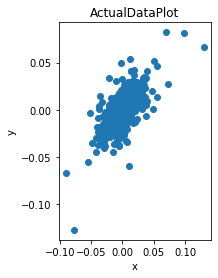

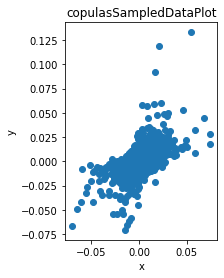

covariance [[1.0, 0.6496737729328129], [0.6496737729328129, 1.0]] 

univariates [{'df': 3.1131958951347753, 'loc': -1.0670582545103842e-05, 'scale': 0.9999862838197262, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}, {'df': 3.2371525127324947, 'loc': -4.57872455608091e-06, 'scale': 1.0000046686981854, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}] 

columns [0, 1] 

type copulas.multivariate.gaussian.GaussianMultivariate 



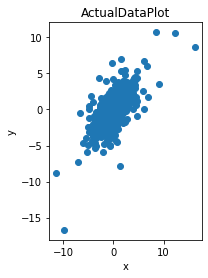

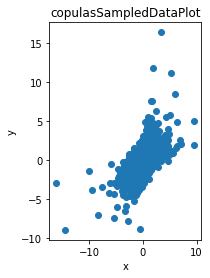

Cumulative Return: [0.51219539]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in multiply


In [ ]:
optimizer_strategy2 = OptimizeStrategy2(xtrain, ytrain, xtest, ytest, 500, beta = 1, model='Student_t') #or 'Clayton'

In [ ]:
import numpy as np
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import kendalltau, pearsonr, spearmanr
from scipy.optimize import minimize
from scipy.integrate import quad
import sys
from collections import deque


class CopulaPairsTradingAlgorithm(QCAlgorithm):
    
    def Initialize(self):
        '''Initialize algorithm and add universe'''
        
        self.SetStartDate(2010, 1, 1)
        self.SetEndDate(2020, 1, 1)
        self.SetCash(100000)
        
        self.numdays = 1000       # length of formation period which determine the copula we use
        self.lookbackdays = 250   # length of history data in trading period
        self.cap_CL = 0.95        # cap confidence level
        self.floor_CL = 0.05      # floor confidence level
        self.weight_v = 0.5       # desired holding weight of asset v in the portfolio, adjusted to avoid insufficient buying power
        self.coef = 0             # to be calculated: requested ratio of quantity_u / quantity_v
        self.window = {}          # stores historical price used to calculate trading day's stock return
        
        self.day = 0              # keep track of current day for daily rebalance
        self.month = 0            # keep track of current month for monthly recalculation of optimal trading pair
        self.pair = []            # stores the selected trading pair
        
        # Select optimal trading pair into the universe
        self.UniverseSettings.Resolution = Resolution.Daily
        self.AddUniverse('PairUniverse', self.PairSelection)


    def OnData(self, slice):
        '''Main event handler. Implement trading logic.'''

        self.SetSignal(slice)     # only executed at first day of each month

        # Daily rebalance
        if self.Time.day == self.day:
            return
        
        long, short = self.pair[0], self.pair[1]

        # Update current price to trading pair's historical price series
        for kvp in self.Securities:
            symbol = kvp.Key
            if symbol in self.pair:
                price = kvp.Value.Price
                self.window[symbol].append(price)

        if len(self.window[long]) < 2 or len(self.window[short]) < 2:
            return
        
        # Compute the mispricing indices for u and v by using estimated copula
        MI_u_v, MI_v_u = self._misprice_index()

        # Placing orders: if long is relatively underpriced, buy the pair
        if MI_u_v < self.floor_CL and MI_v_u > self.cap_CL:
            
            self.SetHoldings(short, -self.weight_v, False, f'Coef: {self.coef}')
            self.SetHoldings(long, self.weight_v * self.coef * self.Portfolio[long].Price / self.Portfolio[short].Price)

        # Placing orders: if short is relatively underpriced, sell the pair
        elif MI_u_v > self.cap_CL and MI_v_u < self.floor_CL:

            self.SetHoldings(short, self.weight_v, False, f'Coef: {self.coef}')
            self.SetHoldings(long, -self.weight_v * self.coef * self.Portfolio[long].Price / self.Portfolio[short].Price)
        
        self.day = self.Time.day


    def SetSignal(self, slice):
        '''Computes the mispricing indices to generate the trading signals.
        It's called on first day of each month'''

        if self.Time.month == self.month:
            return
        
        ## Compute the best copula
        
        # Pull historical log returns used to determine copula
        logreturns = self._get_historical_returns(self.pair, self.numdays)
        x, y = logreturns[str(self.pair[0])], logreturns[str(self.pair[1])]

        # Convert the two returns series to two uniform values u and v using the empirical distribution functions
        ecdf_x, ecdf_y  = ECDF(x), ECDF(y)
        u, v = [ecdf_x(a) for a in x], [ecdf_y(a) for a in y]
        
        # Compute the Akaike Information Criterion (AIC) for different copulas and choose copula with minimum AIC
        tau = kendalltau(x, y)[0]  # estimate Kendall'rank correlation
        AIC ={}  # generate a dict with key being the copula family, value = [theta, AIC]
        
        for i in ['clayton', 'frank', 'gumbel']:
            param = self._parameter(i, tau)
            lpdf = [self._lpdf_copula(i, param, x, y) for (x, y) in zip(u, v)]
            # Replace nan with zero and inf with finite numbers in lpdf list
            lpdf = np.nan_to_num(lpdf) 
            loglikelihood = sum(lpdf)
            AIC[i] = [param, -2 * loglikelihood + 2]
            
        # Choose the copula with the minimum AIC
        self.copula = min(AIC.items(), key = lambda x: x[1][1])[0]
        
        ## Compute the signals
        
        # Generate the log return series of the selected trading pair
        logreturns = logreturns.tail(self.lookbackdays)
        x, y = logreturns[str(self.pair[0])], logreturns[str(self.pair[1])]
        
        # Estimate Kendall'rank correlation
        tau = kendalltau(x, y)[0] 
        
        # Estimate the copula parameter: theta
        self.theta = self._parameter(self.copula, tau)
        
        # Simulate the empirical distribution function for returns of selected trading pair
        self.ecdf_x, self.ecdf_y  = ECDF(x), ECDF(y) 
        
        # Run linear regression over the two history return series and return the desired trading size ratio
        self.coef = stats.linregress(x,y).slope
        
        self.month = self.Time.month
        

    def PairSelection(self, date):
        '''Selects the pair of stocks with the maximum Kendall tau value.
        It's called on first day of each month'''
        
        if date.month == self.month:
            return Universe.Unchanged
        
        symbols = [ Symbol.Create(x, SecurityType.Equity, Market.USA) 
                    for x in [  
                                "QQQ", "XLK",
                                "XME", "EWG", 
                                "TNA", "TLT",
                                "FAS", "FAZ",
                                "XLF", "XLU",
                                "EWC", "EWA",
                                "QLD", "QID"
                            ] ]

        logreturns = self._get_historical_returns(symbols, self.lookbackdays)
        
        tau = 0
        for i in range(0, len(symbols), 2):
            
            x = logreturns[str(symbols[i])]
            y = logreturns[str(symbols[i+1])]
            
            # Estimate Kendall rank correlation for each pair
            tau_ = kendalltau(x, y)[0]
            
            if tau > tau_:
                continue

            tau = tau_
            self.pair = symbols[i:i+2]
        
        return [x.Value for x in self.pair]


    def OnSecuritiesChanged(self, changes):
        '''Warms up the historical price for the newly selected pair.
        It's called when current security universe changes'''
        
        for security in changes.RemovedSecurities:
            symbol = security.Symbol
            self.window.pop(symbol)
            if security.Invested:
                self.Liquidate(symbol, "Removed from Universe")
        
        for security in changes.AddedSecurities:
            self.window[security.Symbol] = deque(maxlen = 2)
        
        # Get historical prices
        history = self.History(list(self.window.keys()), 2, Resolution.Daily)
        history = history.close.unstack(level=0)
        for symbol in self.window:
            self.window[symbol].append(history[str(symbol)][0])

        
    def _get_historical_returns(self, symbols, period):
        '''Get historical returns for a given set of symbols and a given period
        '''
        
        history = self.History(symbols, period, Resolution.Daily)
        history = history.close.unstack(level=0)
        return (np.log(history) - np.log(history.shift(1))).dropna()
        
        
    def _parameter(self, family, tau):
        ''' Estimate the parameters for three kinds of Archimedean copulas
        according to association between Archimedean copulas and the Kendall rank correlation measure
        '''
        
        if  family == 'clayton':
            return 2 * tau / (1 - tau)
        
        elif family == 'frank':
            
            '''
            debye = quad(integrand, sys.float_info.epsilon, theta)[0]/theta  is first order Debye function
            frank_fun is the squared difference
            Minimize the frank_fun would give the parameter theta for the frank copula 
            ''' 
            
            integrand = lambda t: t / (np.exp(t) - 1)  # generate the integrand
            frank_fun = lambda theta: ((tau - 1) / 4.0  - (quad(integrand, sys.float_info.epsilon, theta)[0] / theta - 1) / theta) ** 2
            
            return minimize(frank_fun, 4, method='BFGS', tol=1e-5).x 
        
        elif family == 'gumbel':
            return 1 / (1 - tau)
            

    def _lpdf_copula(self, family, theta, u, v):
        '''Estimate the log probability density function of three kinds of Archimedean copulas
        '''
        
        if  family == 'clayton':
            pdf = (theta + 1) * ((u ** (-theta) + v ** (-theta) - 1) ** (-2 - 1 / theta)) * (u ** (-theta - 1) * v ** (-theta - 1))
            
        elif family == 'frank':
            num = -theta * (np.exp(-theta) - 1) * (np.exp(-theta * (u + v)))
            denom = ((np.exp(-theta * u) - 1) * (np.exp(-theta * v) - 1) + (np.exp(-theta) - 1)) ** 2
            pdf = num / denom
            
        elif family == 'gumbel':
            A = (-np.log(u)) ** theta + (-np.log(v)) ** theta
            c = np.exp(-A ** (1 / theta))
            pdf = c * (u * v) ** (-1) * (A ** (-2 + 2 / theta)) * ((np.log(u) * np.log(v)) ** (theta - 1)) * (1 + (theta - 1) * A ** (-1 / theta))
            
        return np.log(pdf)


    def _misprice_index(self):
        '''Calculate mispricing index for every day in the trading period by using estimated copula
        Mispricing indices are the conditional probability P(U < u | V = v) and P(V < v | U = u)'''
        
        return_x = np.log(self.window[self.pair[0]][-1] / self.window[self.pair[0]][-2])
        return_y = np.log(self.window[self.pair[1]][-1] / self.window[self.pair[1]][-2])
        
        # Convert the two returns to uniform values u and v using the empirical distribution functions
        u = self.ecdf_x(return_x)
        v = self.ecdf_y(return_y)
        
        if self.copula == 'clayton':
            MI_u_v = v ** (-self.theta - 1) * (u ** (-self.theta) + v ** (-self.theta) - 1) ** (-1 / self.theta - 1) # P(U<u|V=v)
            MI_v_u = u ** (-self.theta - 1) * (u ** (-self.theta) + v ** (-self.theta) - 1) ** (-1 / self.theta - 1) # P(V<v|U=u)
    
        elif self.copula == 'frank':
            A = (np.exp(-self.theta * u) - 1) * (np.exp(-self.theta * v) - 1) + (np.exp(-self.theta * v) - 1)
            B = (np.exp(-self.theta * u) - 1) * (np.exp(-self.theta * v) - 1) + (np.exp(-self.theta * u) - 1)
            C = (np.exp(-self.theta * u) - 1) * (np.exp(-self.theta * v) - 1) + (np.exp(-self.theta) - 1)
            MI_u_v = B / C
            MI_v_u = A / C
        
        elif self.copula == 'gumbel':
            A = (-np.log(u)) ** self.theta + (-np.log(v)) ** self.theta
            C_uv = np.exp(-A ** (1 / self.theta))   # C_uv is gumbel copula function C(u,v)
            MI_u_v = C_uv * (A ** ((1 - self.theta) / self.theta)) * (-np.log(v)) ** (self.theta - 1) * (1.0 / v)
            MI_v_u = C_uv * (A ** ((1 - self.theta) / self.theta)) * (-np.log(u)) ** (self.theta - 1) * (1.0 / u)
            
        return MI_u_v, MI_v_u

NameError: ignored